<a href="https://colab.research.google.com/github/maliekici/Prophet-Analysis-The-Time-Series-Data/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Analysis with Prophet**


Prophet kütüpahnesi, tek değikenli zaman serisi veri kümeleri için tahminler yapmak için tasarlanmış açık kaynak kaynaklı bir kütüphanedir. Kullanımı kolaydır ve varsayılan olarak trendler ve mevsimsel yapıya sahip veriler için tahminler yapmak amacı ile model için iyi bir hyperparameter kümesini otomatik olarak bulmak için tasarlanmıştır

**Kurulumlar**
---
 Bu projeyi gerçekleştirmek için aşağıdaki kütühanelere ihtiyacımız vardır.
*   fbprophet
*   pandas
*   matplotlib
*   plotly(zorunlu değil fakat prophetin bazı durumlarda ihtiyacı olacak)
*   scikit-learn
---
Gerekli kütüpahenlerin kurulumlarını aşağıdaki kod satırını çalıştırırak tamamlayabilirsiniz

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install prophet pandas matplotlib plotly scikit-learn

**Dataset**

In [ ]:
import pandas as pd
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header = 0)

print(df.shape)
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


**Verinin Görselleştirilmesi**

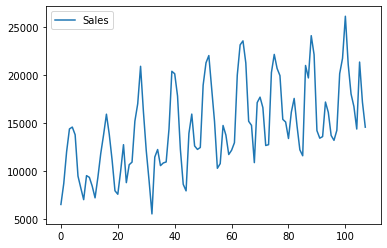

In [ ]:
from matplotlib import pyplot 
df.plot()
pyplot.show()

In [ ]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [ ]:
from prophet import Prophet
model = Prophet()
model.fit(df)

In [ ]:
future = list()
for i in range(1, 13):
  date = '1968-%02d' % i
  future.append([ date ])

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
forecast = model.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1968-01-01,17825.745010,12833.712116,16043.201003,17825.745010,17825.745010,-3460.599457,-3460.599457,-3460.599457,-3460.599457,-3460.599457,-3460.599457,0.0,0.0,0.0,14365.145554
1,1968-02-01,17881.935110,13396.189840,16513.417615,17881.935110,17881.935110,-2948.791878,-2948.791878,-2948.791878,-2948.791878,-2948.791878,-2948.791878,0.0,0.0,0.0,14933.143232
2,1968-03-01,17934.500043,19328.716700,22490.597572,17934.500043,17934.500043,2953.908186,2953.908186,2953.908186,2953.908186,2953.908186,2953.908186,0.0,0.0,0.0,20888.408228
3,1968-04-01,17990.690143,21407.423008,24556.377415,17990.690143,17990.690143,4917.919861,4917.919861,4917.919861,4917.919861,4917.919861,4917.919861,0.0,0.0,0.0,22908.610003
4,1968-05-01,18045.067659,22595.632208,25696.334917,18045.067659,18045.067659,6158.579152,6158.579152,6158.579152,6158.579152,6158.579152,6158.579152,0.0,0.0,0.0,24203.646811


In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14365.145554  12833.712116  16043.201003
1 1968-02-01  14933.143232  13396.189840  16513.417615
2 1968-03-01  20888.408228  19328.716700  22490.597572
3 1968-04-01  22908.610003  21407.423008  24556.377415
4 1968-05-01  24203.646811  22595.632208  25696.334917


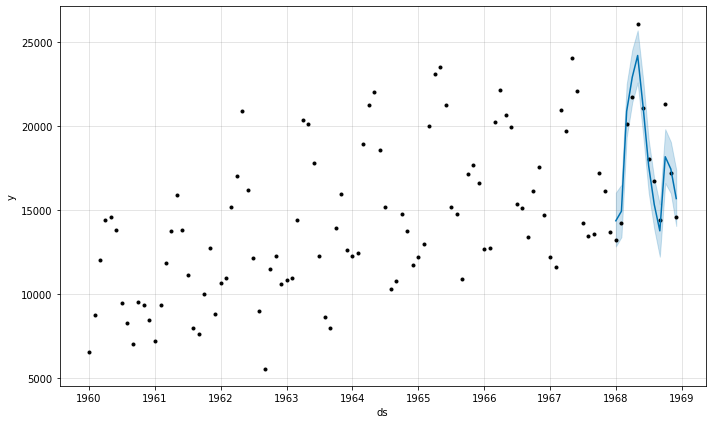

In [ ]:
model.plot(forecast)
pyplot.show()

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15427.072016  13935.548240  16973.298292
1 1969-02-01  16200.303278  14698.969675  17761.182301
2 1969-03-01  21405.664481  19775.173616  22987.319256
3 1969-04-01  23528.599106  22135.813852  25084.038976
4 1969-05-01  25035.673947  23429.132916  26583.363163


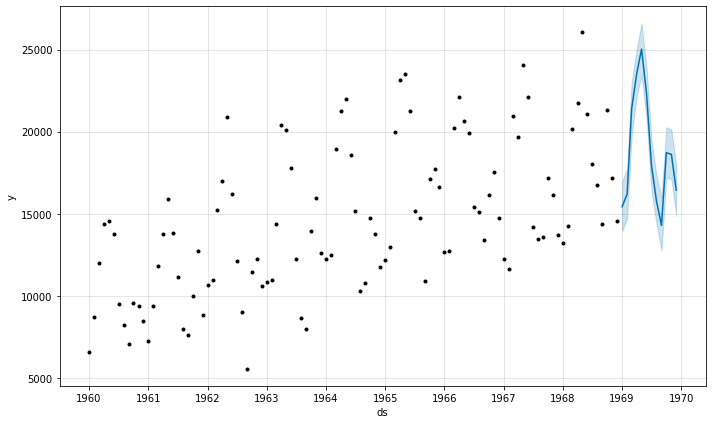

In [ ]:
future = list()
for i in range(1, 13):
  date = '1969-%02d' % i
  future.append([ date ])

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


model.plot(forecast)
pyplot.show()

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot


path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header = 0)


df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
train = df.drop(df.index[-12:]) #modelimizden 1968 yılının bigilerini çıkardık
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [ ]:
model = Prophet()
model.fit(train)

future = list()
for i in range(1, 13):
  date = '1968-%02d' % i
  future.append([ date ])

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
forecast = model.predict(future)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9v8_j9w/ctsq9f3q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9v8_j9w/g8n3mee7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57816', 'data', 'file=/tmp/tmpn9v8_j9w/ctsq9f3q.json', 'init=/tmp/tmpn9v8_j9w/g8n3mee7.json', 'output', 'file=/tmp/tmp94r4k_9i/prophet_model-20220929124333.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:43:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:43:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values

In [ ]:
mea = mean_absolute_error(y_true, y_pred)
print('MAE: %.3F' % mea)

MAE: 1336.813


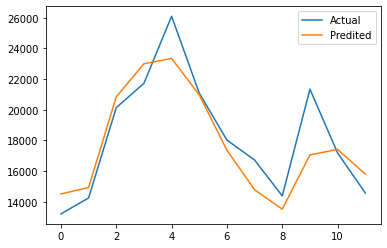

In [ ]:
pyplot.plot(y_true, label="Actual")
pyplot.plot(y_pred, label="Predited")
pyplot.legend()
pyplot.show()